# Diabetes Prediction
Using the Pima Indian dataset, predict with an accuracy of greater than 70% that a person may have diabetes.
Tutorial: https://app.pluralsight.com/library/courses/python-understanding-machine-learning/table-of-contents

## Libraries Used:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pandas import DataFrame
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.naive_bayes import GaussianNB

#### Display Graphs inline:

In [2]:
%matplotlib inline

##### Read Data:

In [3]:
df = pd.read_csv("./Data/pima-data.csv")
df.shape

(768, 10)

In [4]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


##### Check Nulls:

In [5]:
df.isnull().values.any()

False

## Plot Correlation
Displays a matrix between the columns.
Blue is the least correlated and Yellow is the most correlated.

In [6]:
def plot_correlation(df: DataFrame, size: int=11):
    correlation = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(correlation)
    plt.xticks(range(len(correlation.columns)), correlation.columns)
    plt.yticks(range(len(correlation.columns)), correlation.columns)
    plt.show()

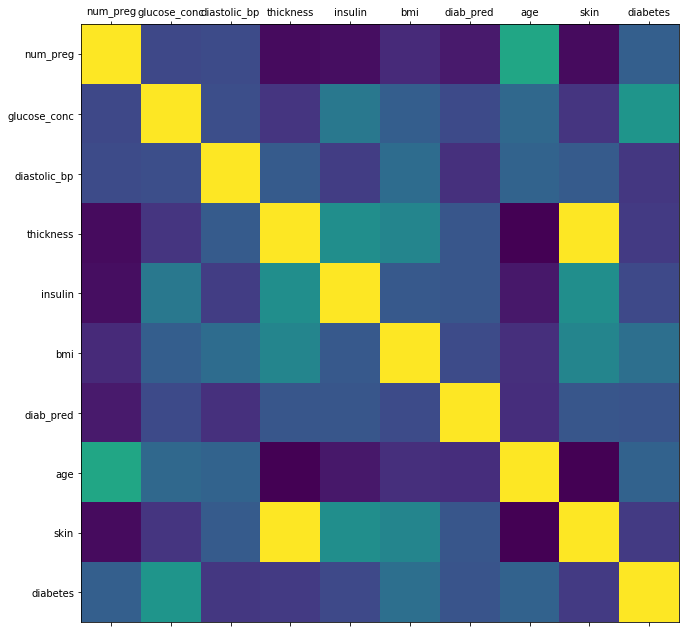

In [7]:
plot_correlation(df)

In [8]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [9]:
del df["skin"]

In [10]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


Change True to 1 and False to 0

In [11]:
diabetes_map = {True : 1, False : 0}

In [12]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [13]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


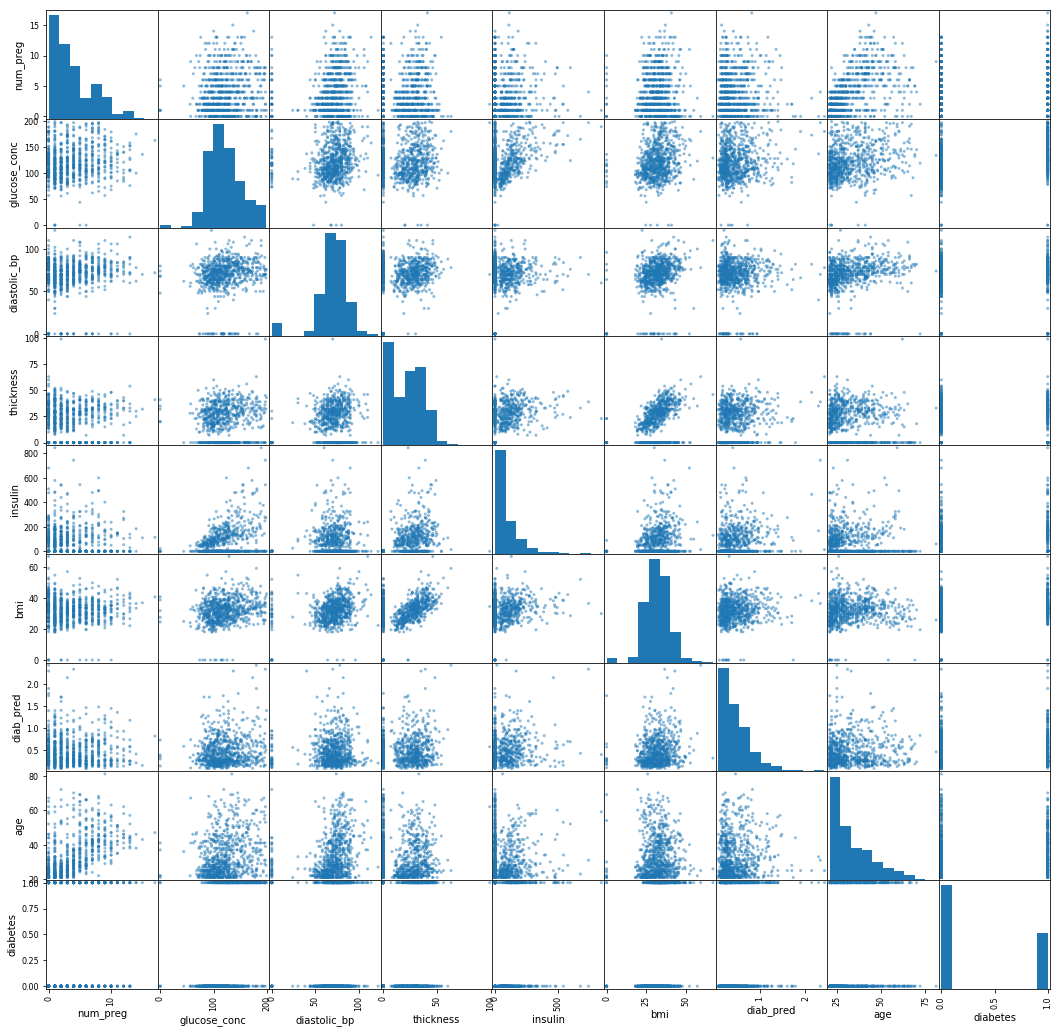

In [14]:
pd.plotting.scatter_matrix(df, figsize=(18, 18))
plt.show()

##### True False ratio:

In [15]:
n_true  = len(df.loc[df["diabetes"] == True])
n_false = len(df.loc[df["diabetes"] == False])
print("Number of True cases:  {0} ({1:2.2f}%)".format(n_true, n_true / (n_true + n_false) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(n_false, n_false / (n_true + n_false) * 100))
print("Total:                 {0}".format(n_true + n_false))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)
Total:                 768


## Selecting Algorithm
### Criteria
 - Learning: Supervised
 - Result: Binary classification
 - Non-ensemble
 - Basic

### First Algorithm: Naive Bayes

## Split the data
70% for training, 30% for testing. This allows you to prevent biases.

In [16]:
headers = list(df.columns.values)
predicted_class = headers.pop(headers.index("diabetes"))

X = df[headers].values # Predictor feature columns
Y = df[predicted_class].values # Predicted class
split_size = 0.30

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=split_size, random_state=33)

Check split:

In [17]:
print("{0:0.2f}% in training set.".format((len(X_train) / len(df.index)) * 100))
print("{0:0.2f}% in test set.".format((len(X_test) / len(df.index)) * 100))

69.92% in training set.
30.08% in test set.


### Post-Split Data Preparation

#### Hidden Missing Values

Check for 0 values that aren't possible

In [18]:
for h in headers:
    print("# of rows missing in {0}: {1}".format(h, len(df.loc[df[h] == 0])))

# of rows missing in num_preg: 111
# of rows missing in glucose_conc: 5
# of rows missing in diastolic_bp: 35
# of rows missing in thickness: 227
# of rows missing in insulin: 374
# of rows missing in bmi: 11
# of rows missing in diab_pred: 0
# of rows missing in age: 0


0 in pregnancies is OK.

### Impute with mean

In [19]:
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

# Training Initial Algorithm - Naive Bayes

In [20]:
nb_model = GaussianNB()

nb_model.fit(X_train, Y_train.ravel())

GaussianNB(priors=None)

## Accuracy on Training Data

In [21]:
gnb_preds = nb_model.predict(X_train)

accuracy_of_x_train = nb_model.score(X_train, Y_train)
accuracy_of_x_train2 = metrics.accuracy_score(Y_train, gnb_preds)

print("Accuracy on X_test: {}".format(accuracy_of_x_train))
print("Accuracy on X_test using metrics module: {}".format(accuracy_of_x_train2))

Accuracy on X_test: 0.770949720670391
Accuracy on X_test using metrics module: 0.770949720670391


## Accuracy on Test Data

In [22]:
gnb_test_preds = nb_model.predict(X_test)

accuracy_of_x_test = nb_model.score(X_test, Y_test)
accuracy_of_x_test2 = metrics.accuracy_score(Y_test, gnb_test_preds)

print("Accuracy on X_test: {}".format(accuracy_of_x_test))
print("Accuracy on X_test using metrics module: {}".format(accuracy_of_x_test2))

Accuracy on X_test: 0.7402597402597403
Accuracy on X_test using metrics module: 0.7402597402597403


## Metrics

### Confusion Matrix

- Left column is predicted False
- Right column is predicted True
- Top row is actual False
- Bottom row is actual True

| | Predicted False | Predicted True |
|---:|:---:|:---:|
| Actual False | True Negative (Actually not diabetes and predicted to be not diabetes) | False Positive (Actually not diabetes but predicted to be diabetes) |
| Actual True | False Negative (Actually diabetes but predicted to be not diabetes) | True Positive (Actually diabetes and predicted to be diabetes) |


In [23]:
print("{}".format(metrics.confusion_matrix(Y_test, gnb_test_preds)))

[[123  23]
 [ 37  48]]


### Classification Report

_Remember: class 1 is Diabetes and class 0 is Not Diabetes_

Recall for class 1 is the True positive rate/sensitivity. It shows how well the model can correctly predict diabetes when the result is diabetes.

Recall = True Positive / (True Positive + False Negative)

The precision for class 1 is a positive predictor value which shows how often the patient had diabetes when the model said they would.

Precision = True Positive / (True Positive + False Positive)

In [24]:
print(metrics.classification_report(Y_test, gnb_test_preds))

             precision    recall  f1-score   support

          0       0.77      0.84      0.80       146
          1       0.68      0.56      0.62        85

avg / total       0.73      0.74      0.73       231

